# Digital Signal Processing
## Convolution and Correlation

### MsCV - ViBOT - MAIA

In [3]:
%matplotlib inline
%pprint off

# To make some nice plot
import matplotlib.pyplot as plt
# To play with arrays
import numpy as np
from skimage import io
from skimage import img_as_float
from matplotlib import cm
from scipy import signal
from scipy import misc
from PIL import Image

Pretty printing has been turned OFF


## Exercise 1- 1D Convolution

**1.1** Defining a signal $x$ and an impulse response $h$ as parameters, write a program `conv_fn` to compute the convolution product $y=h*x$. Do not use the python or matlab function and just consider zero padding to solve the border problem.

**1.2** Test your function, while using the following signal ($x[n] = \{\underline{1},2,3,4\}$) and following filters, ($\delta[k]$, $H[k]$, $e^{k}$, and $h = \{-1, 1\}$), respectively.

**1.3** Consider the previous input signal, write it's extended version while considering `symmetry`, `periodic` and `constant values` padding and $h = H[k-5]$



In [16]:
# Function with a parameter mode to decide the mode of edge padding
# mode='constant' by default
def conv(x,h,mode='constant'):
    if (mode=='symmetric'):
        xpad = np.lib.pad(x, (len(h)-1,len(h)-1), 'symmetric')
    elif (mode=='periodic'):
        xpad = np.lib.pad(x, (len(h)-1,len(h)-1), 'median')
    elif (mode=='constant'):
        xpad = np.lib.pad(x, (len(h)-1,len(h)-1), 'constant', constant_values = (0))
    
    x_conv = np.zeros((len(x)+len(h)-1,))
    
    # Inverting the filter
    hf = h[::-1]
    
    #print(xpad)
    #print(x_conv)
    #print(hf)
    for i in range(len(x_conv)):
        #print("i=%f"%i)
        for j in range(len(h)):
            #print("h=%f"%j)
            x_conv[i] += xpad[i+j] * hf[j]
            #print(x_conv)
    return x_conv

def dirac(n=0, N=20):
    if n > N - 1:
        raise ValueError('n should be in the range from 0 to N-1')
            
    s = np.zeros((N, ))
    s[n] = 1
    
    return s

def step(n=0, N=20):
    if n > N - 1:
        raise ValueError('n should be in the range from 0 to N-1')
    
    s = np.zeros((N, ))
    for n in range (n, N):
        s[n] = 1
    
    return s

def exp(n=0, N=20):
    if n>N-1:
        raise ValueError('n should be in the range from 0 to N-1')
        
    s = np.zeros((N, ))
    for n in range (n,N):
        s[n] = np.exp(n)
    
    return s

x = [1,2,3,4]
h1 = [0,0,1,0,0]
h2 = [0,0,1,1,1,]
h3 = [-1,0,1]
conv_out1 = conv(x,h1, 'periodic')
conv_out2 = conv(x,h2,'symmetric')
conv_out3 = conv(x,h3)
print(conv_out1)
print(conv_out2)
print(conv_out3)

[ 2.  2.  1.  2.  3.  4.  2.  2.]
[  9.   6.   4.   4.   6.   9.  11.  11.]
[-1. -2. -2. -2.  3.  4.]


In [17]:
x = [1,2,3,4]
h1 = dirac(N=5)
h2 = step(N=5)
h3 = exp(N=5)
h4= np.array([-1,0,1])

conv_out1= conv(x,h1, 'constant')
conv_out2=conv(x,h2, 'symmetric')
conv_out3=conv(x,h3)
conv_out4=conv(x,h4, 'periodic')
print(conv_out1)
print(conv_out2)
print(conv_out3)
print(conv_out4)

[ 1.  2.  3.  4.  0.  0.  0.  0.]
[ 11.   9.   9.  11.  14.  16.  16.  14.]
[   1.            4.71828183   15.82561976   47.01849461  127.80951949
  199.00913523  244.13659779  218.39260013]
[ 1.  0. -2. -2.  1.  2.]


## Exercise 2- 2D Convolution

**2.1** Define a 2D convolution function (Only consider zero-padding the image)

**2.2** Using your function, smooth the `lena` image with the following Gaussian kernel:
$$ K = \frac{1.}{256}\begin{bmatrix} 1 & 4 & 6 & 4 & 1 \\ 4 & 16 & 24 & 16 & 4 \\ 6 & 24 & 36 & 24 & 6 \\ 4 & 16 & 24 & 16 & 4 \\ 1 & 4 & 6 & 4 & 1 \end{bmatrix}$$

**2.3** Apply sobel filtering using convolution


In [6]:
def conv2d(x,y):
    #convolve2d function by default padds the first input with zero given 
    #by the parameter 'boundary='fill''
    s = signal.convolve2d(x,y)
    return s

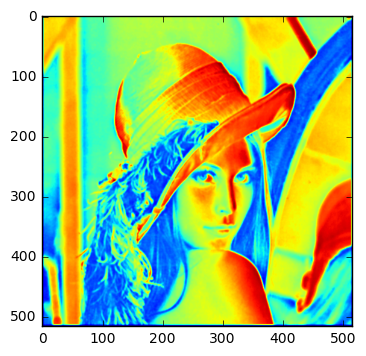

In [7]:
lena = Image.open("./images/lena-grey.bmp")
lena_im = np.array(lena)
K  = np.array([[1,4,6,4,1],[4,16,24,16,4],[6,24,36,24,6],[4,16,24,16,4],[1,4,6,4,1]])
K = 1/256 * K
out = conv2d(lena_im, K)
plt.figure()
plt.imshow(out)

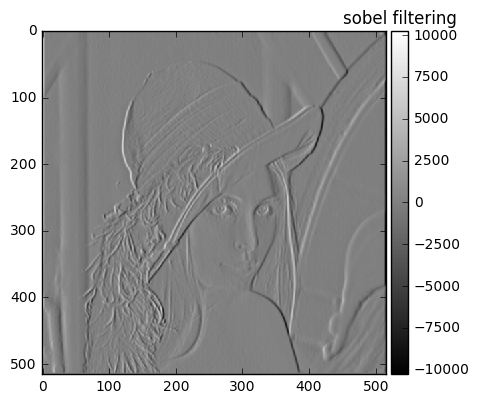

In [8]:
#sobel filter
sob_ker  = np.matrix([[1,2,0,-2,-1],[4,8,0,-8,-4],[6,12,0,-12,-6], [4,8,0,-8,-4], [1,2,0,-2,-1] ])

lena_sob = conv2d(lena_im,sob_ker)

io.imshow(lena_sob, cmap = plt.cm.gray)
plt.title('sobel filtering')

## Exercise 3 - Character recognition using cross-correlation

**3.1** load `a.png` and `text.png` images and binarized them using [`threshold_otsu`](http://scikit-image.org/docs/dev/api/skimage.filters.html?highlight=filters#skimage.filters.threshold_otsu)

**3.2** Use [`signal.correlate2d`](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.signal.correlate2d.html#scipy.signal.correlate2d) from `scipy` to correlate your binarized images.
**Note, signal correspond to the bright pixels within and image (invert your masks)**

**3.3** Find the first 10 characters recognized as `a`.

/home/anirudh/anaconda3/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image dynamic range; displaying image with stretched contrast.
  warn("Low image dynamic range; displaying image with "


first 10 characters recognized as a : 
1, a is detected at pixel location (38, 150)
2, a is detected at pixel location (64, 144)
3, a is detected at pixel location (116, 175)
4, a is detected at pixel location (142, 96)
5, a is detected at pixel location (142, 169)
6, a is detected at pixel location (168, 130)
7, a is detected at pixel location (194, 23)
8, a is detected at pixel location (220, 138)
9, a is detected at pixel location (246, 103)
10, a is detected at pixel location (246, 160)


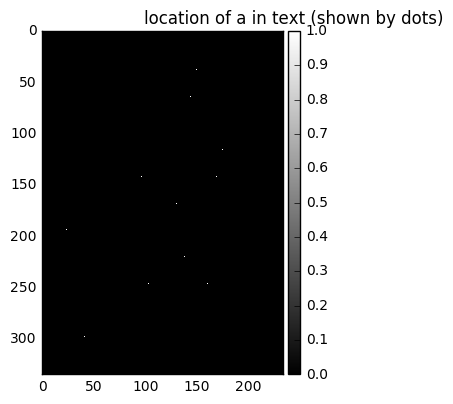

In [14]:
from skimage import color
from skimage import filters
from scipy.signal import correlate2d

#read images and convert to binary

text_im = io.imread("./images/text.png")
text_im = color.rgb2gray(text_im)
text_im_thresh = filters.threshold_otsu(text_im)
text_im = (text_im < text_im_thresh).astype(int)

a_im = io.imread("./images/a.png")
a_im = color.rgb2gray(a_im)
a_im_thresh = filters.threshold_otsu(a_im)
a_im = (a_im < a_im_thresh).astype(int)

#cross corelation of images
cross_corr = correlate2d(text_im, a_im) 

#get the maximum cross correlation value
cross_corr_max = np.max(cross_corr)

#take value greater than 85% of maximum to correctly detect 'a'
cross_corr_a = cross_corr > (0.85*cross_corr_max)

plt.figure()
io.imshow(cross_corr_a, cmap = plt.cm.gray) #dots represent location of 'a'
plt.title('location of a in text (shown by dots)')

total_a = 0
print('first 10 characters recognized as a : ')
for r in range(text_im.shape[0]):
    for c in range(text_im.shape[1]):
        if cross_corr_a[r][c] > 0:
            total_a += 1
            print('%d, a is detected at pixel location (%d, %d)'%(total_a,r,c))
    if total_a == 10:
        break
                
